# **STINTSY Project**
**S16 Group 1**

Names:

Adrada, Jasper John

David, Rain Caitlin Aelis

Badiola, Maxine Beatriz

Ogatia, Graham Joshua



# **Load Dataset**

In [1]:
import pandas as pd
file = 'pumpkin_seeds.csv'
df = pd.read_csv(file, encoding='latin1')

display(df.head(10))

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,erevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,erevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,erevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,erevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,erevelik


# Section 1. Introduction to the problem/task and dataset

Pumpkin seeds, a significant agricultural product, are widely grown in Turkey and they are valued for their nutritional content. They are classified to various types based on different characteristics and attributes. For this project, the dataset we have chosen is the **Pumpkin Seed Dataset**, which focuses on classifying pumpkin seeds into two distinct categories: `Cercevelik` and `Urgup Sivrisi`.

The dataset includes different features that describe the geometric and physical properties of pumpkin seeds, including `Area`, `Perimeter`, `Eccentricity`, `Roundness`, and more. These are measured using image processing techniques which provided quantitative data about the seeds.

The task at hand is a **classification problem**, where we aim to predict the class label of the seed based on these features. The models selected for this project include **KNN**, **Logistic Regression**, and **Decision Trees**, each of which will be applied to predict the correct class label and evaluate the performance of the classification.


# Section 2. Description of the dataset

**Description of the Dataset**

The **Pumpkin Seeds Dataset** focuses on classifying two types of pumpkin seeds: **Cercevelik** and **Urgup Sivrisi**, which are distinct species grown in Turkey. These seeds are valued for their nutritional content, including carbohydrates, fats, proteins, and essential minerals like calcium, magnesium, and zinc. The dataset includes measurements derived from image processing techniques, capturing physical and geometric properties of the seeds.



**Data Collection**

The dataset was constructed by photographing seeds using a custom-designed imaging setup including a product shooting box, a camera, and a lighting mechanism to ensure consistent lighting and eliminate shadows. Images were processed to extract 12 morphological features by applying grayscale and binary threshold techniques, followed by noise removal (Koklu, et. al., 2021). The use of image processing ensures precise feature extraction and provides a reliable basis for classification. However, there are potential biases due to imaging inconsistencies or the fixed setup may not account for variability in real-world scenarios. 



**Dataset Structure**

- **Rows**: Each row represents one pumpkin seed, with a total of **2500 instances**.
- **Columns**: Each column corresponds to a specific feature of the seed, along with the class label. There are **12 morphological features** plus a categorical target feature (`Class`), making a total of **13 columns**.
- **Class Labels**:
  - `Cercevelik`: A variety known for its rounder, more compact seeds.
  - `Urgup Sivrisi`: A type characterized by longer, thinner seeds with pointed tips.



**Features**

1. `Area`: Number of pixels within the seed’s borders.
2. `Perimeter`: Circumference of the seed in pixels.
3. `Major Axis Length`: Length of the seed’s largest axis.
4. `Minor Axis Length`: Length of the seed’s smallest axis.
5. `Convex Area`: Pixels in the smallest convex shell enclosing the seed.
6. `Equiv Diameter`: Diameter assuming the area as a circle.
7. `Eccentricity`: Measure of seed elongation.
8. `Solidity`: Proportion of the convex to concave surface.
9. `Extent`: Area-to-bounding box pixel ratio.
10. `Roundness`: Seed ovality without edge distortions.
11. `Aspect Ratio`: Width-to-length ratio of the seed.
12. `Compactness`: Area relative to a circle with the same perimeter.
13. `Class`: Categorical label (Urgup Sivrisi or Cercevelik).


# Section 3. List of requirements

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Section 4. Data preprocessing and cleaning

## A. Cleaning the Dataset

To ensure the dataset's integrity, we first check for duplicate rows because it can lead to biased results and redundancy during training.

In [3]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 0


There are no duplicate rows so there is no need for further action. Next, check for null values.

In [4]:
null_val = df.isnull().sum()
print("Missing values in each column:\n",null_val)

Missing values in each column:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


All columns do not have any missing values, meaning that the dataset is complete and that there is no need for imputation or removal of rows/columns. 

Looking at the dataset, the `Class` column contains corrupted characters. Let us first check its unique values to see what the problem is.

In [5]:
print("Class:", df['Class'].unique())

Class: ['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


The output shows that the Class column contains corrupted characters such as `\x82er\x8develik` and `\x86rg\x9fp Sivrisi`. Replace the corrupted characters with the correct values, `Cercevelik` and `Urgup Sivrisi`, to fix the encoding issues.

In [6]:
df['Class'] = df['Class'].str.replace('\x82er\x8develik', 'Cercevelik', regex=False)
df['Class'] = df['Class'].str.replace('\x86rg\x9fp Sivrisi', 'Urgup Sivrisi', regex=False)
print("Fixed unique values in 'Class':", df['Class'].unique())


Fixed unique values in 'Class': ['Cercevelik' 'Urgup Sivrisi']


The models we are using are **Decision Trees**, **Logistic Regression**, and **KNN**. These models require numerical inputs therefore we need to encode the `Class` column to numerical values. Since the `Class` column is binary,  **label encoding (0,1)** is sufficient for this project.

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

print(df['Class'].unique())  # Output: [0, 1]


[0 1]


## B. Check and Handle Outliers

For this step, the z-score for each numerical column in the dataset is calculated to detect outliers.

In [8]:
from scipy.stats import zscore
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numerical column
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Area                 13
Perimeter             8
Major_Axis_Length     8
Minor_Axis_Length     9
Convex_Area          13
Equiv_Diameter        9
Eccentricity         14
Solidity             29
Extent               13
Roundness             4
Aspect_Ration         8
Compactness           2
dtype: int64


To visually see the outliers, we used boxplots in each column. 

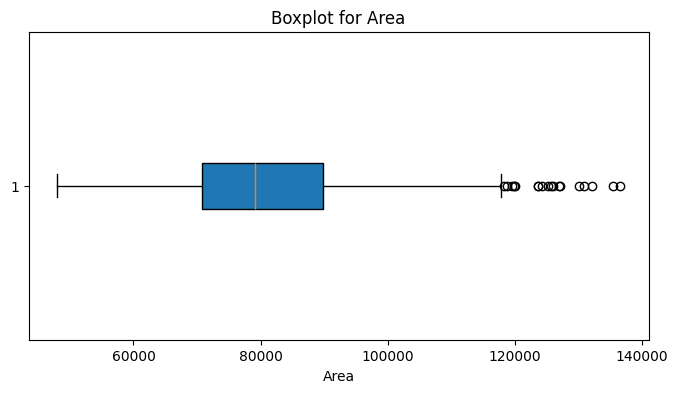

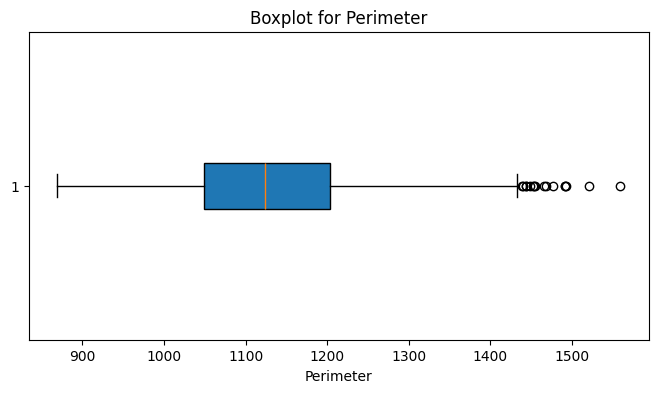

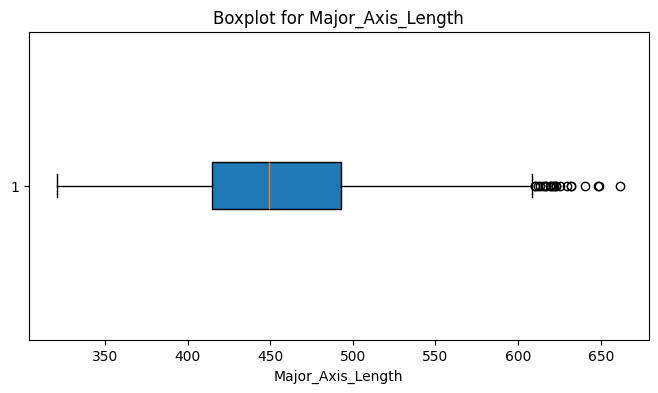

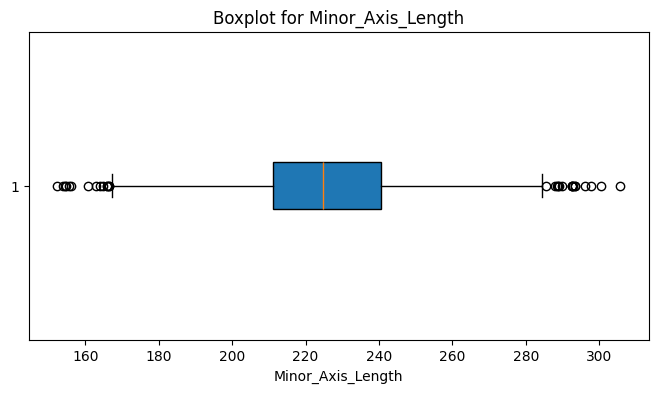

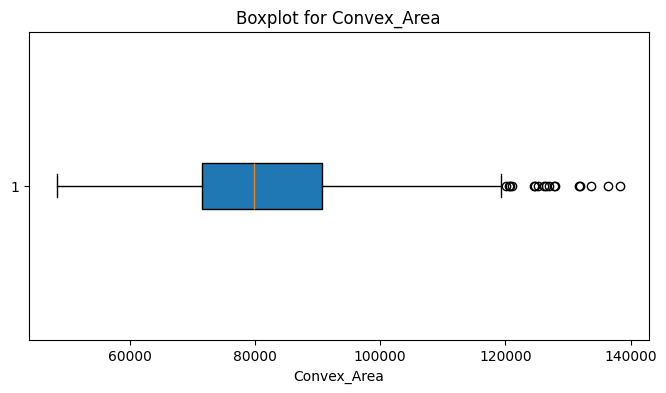

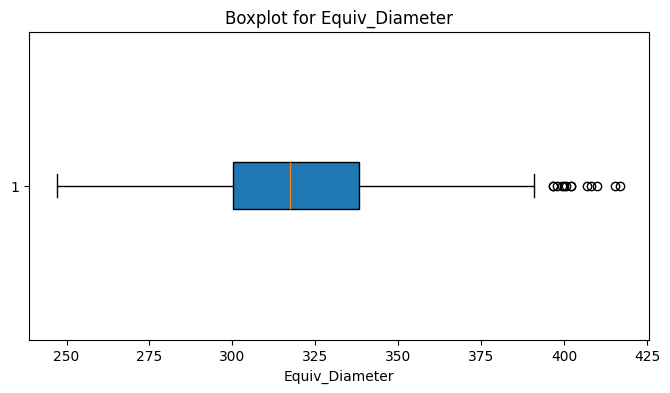

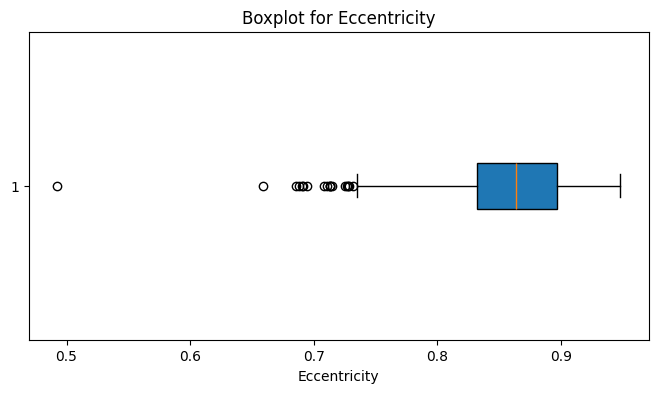

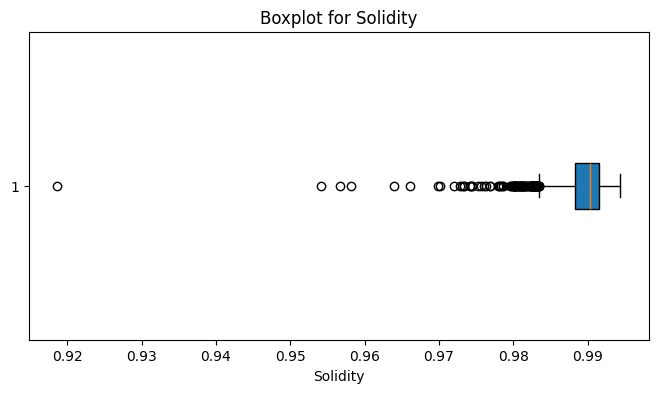

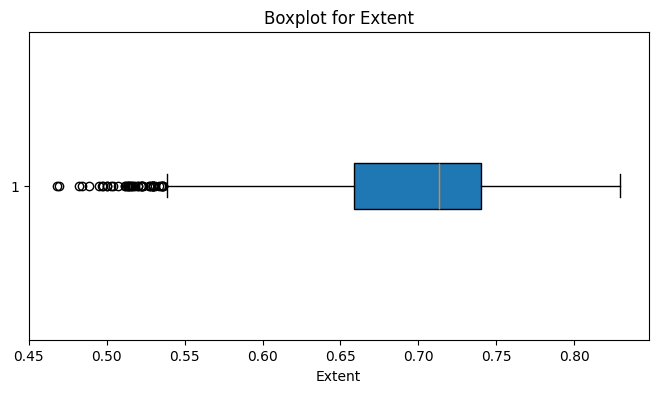

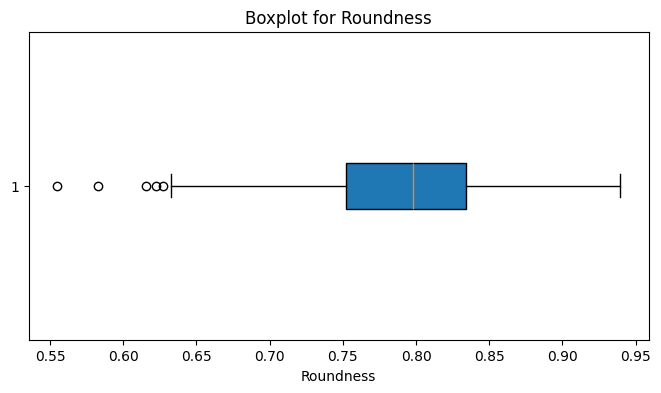

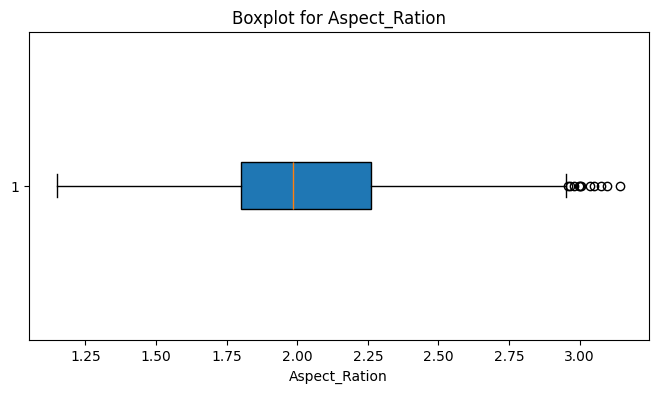

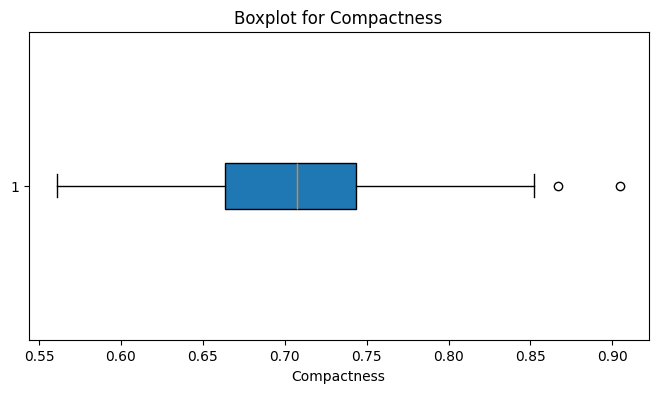

In [9]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

Outliers will be kept due to the nature of the dataset. The columns represent natural variations of the seed which are important for ensuring the diversity of pumpkin seed characteristics are represented. For some features, extreme values are likely due to uncommon biological variations, reflecting different pumpkin varieties. Removing these could discard valuable information about seed diversity.

## C. Data Preprocessing

The features will be standardized to have a mean of 0 and a standard deviation of 1, which will help improve model performance and convergence.

### Standardization for Logistic Regression

Let's check the data first to understand the range, mean, and standard deviation of each feature.

In [10]:
print(df.describe())

                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min 

Standardize data using StandardScaler. After standardization, check the dataset again to confirm that the features now have a mean approximately 0 and a standard deviation of 1.

In [11]:
from sklearn.preprocessing import StandardScaler

X_logistic = df.drop('Class', axis=1)  # Features
y_logistic = df['Class']  # Target

scaler_logistic = StandardScaler()

X_logistic_standardized = scaler_logistic.fit_transform(X_logistic)

X_logistic_standardized = pd.DataFrame(X_logistic_standardized, columns=X_logistic.columns)

df = X_logistic_standardized.copy()
df['Class'] = y_logistic

print(df.describe())

               Area     Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2.500000e+03  2.500000e+03       2.500000e+03       2.500000e+03   
mean   3.183231e-16  8.185452e-16       1.136868e-15      -6.821210e-17   
std    1.000200e+00  1.000200e+00       1.000200e+00       1.000200e+00   
min   -2.394946e+00 -2.396623e+00      -2.414559e+00      -3.160797e+00   
25%   -7.241533e-01 -7.456364e-01      -7.406740e-01      -6.246192e-01   
50%   -1.158137e-01 -6.048465e-02      -1.263728e-01      -4.687420e-02   
75%    6.660392e-01  6.688495e-01       6.427063e-01       6.387421e-01   
max    4.092863e+00  3.928894e+00       3.651604e+00       3.435560e+00   

        Convex_Area  Equiv_Diameter  Eccentricity      Solidity        Extent  \
count  2.500000e+03    2.500000e+03  2.500000e+03  2.500000e+03  2.500000e+03   
mean  -5.229595e-16    3.410605e-16  9.094947e-16  2.377192e-14  1.591616e-16   
std    1.000200e+00    1.000200e+00  1.000200e+00  1.000200e+00  1.000200e+00   


Check standardized dataset.

In [12]:
display(df)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,0
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,0
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,0
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,0
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344,1
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340,1
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465,1
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814,1


# Section 5. Exploratory data analysis

#### **Dataset Overview**
To better understand the structure and content of the dataset, we first display the following:
- **First few rows of the dataset** using `df.head()`.
- **Summary of the dataset** structure, including data types and non-null counts, using `df.info()`.
- **Statistical summary** of numerical columns using `df.describe()`.

In [13]:
display(df.head())
print(df.info())
print(df.describe())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,0
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,0
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,0
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,0
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int32  
dtypes: float64(12), int32(1)
memory usage: 244.3 KB
None
               Area     Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2.500000e+03  2.500000e+03       

#### **Target Variable: `Class` Analysis**
Next, the distribution of the target variable `Class` will be analyzed by calculating its value counts and visualizing its distribution to gain insights into class balance. This is essential for understanding whether the dataset is balanced or if it still needs additional preprocessing (oversampling or undersampling) during model training.


Class
0    1300
1    1200
Name: count, dtype: int64


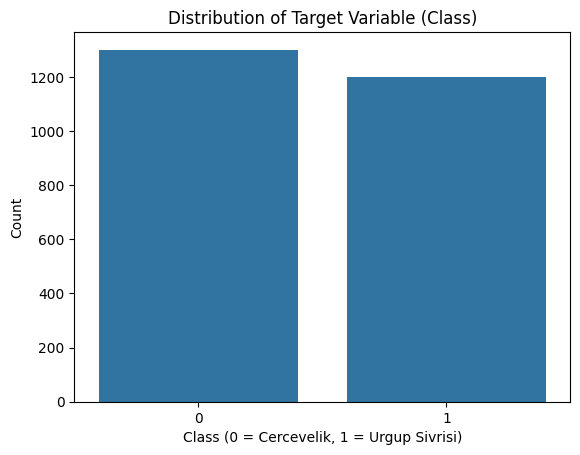

In [14]:
print(df['Class'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
plt.ylabel("Count")
plt.show()


**Observations:** The results show that the difference between the two classes in the `Class` column is relatively small so there doesn't appear to be a strong need for additional preprocessing. This is important because classification models can perform better when the dataset is balanced or nearly balanced.

Moving on, visualize the distribution of numerical features.

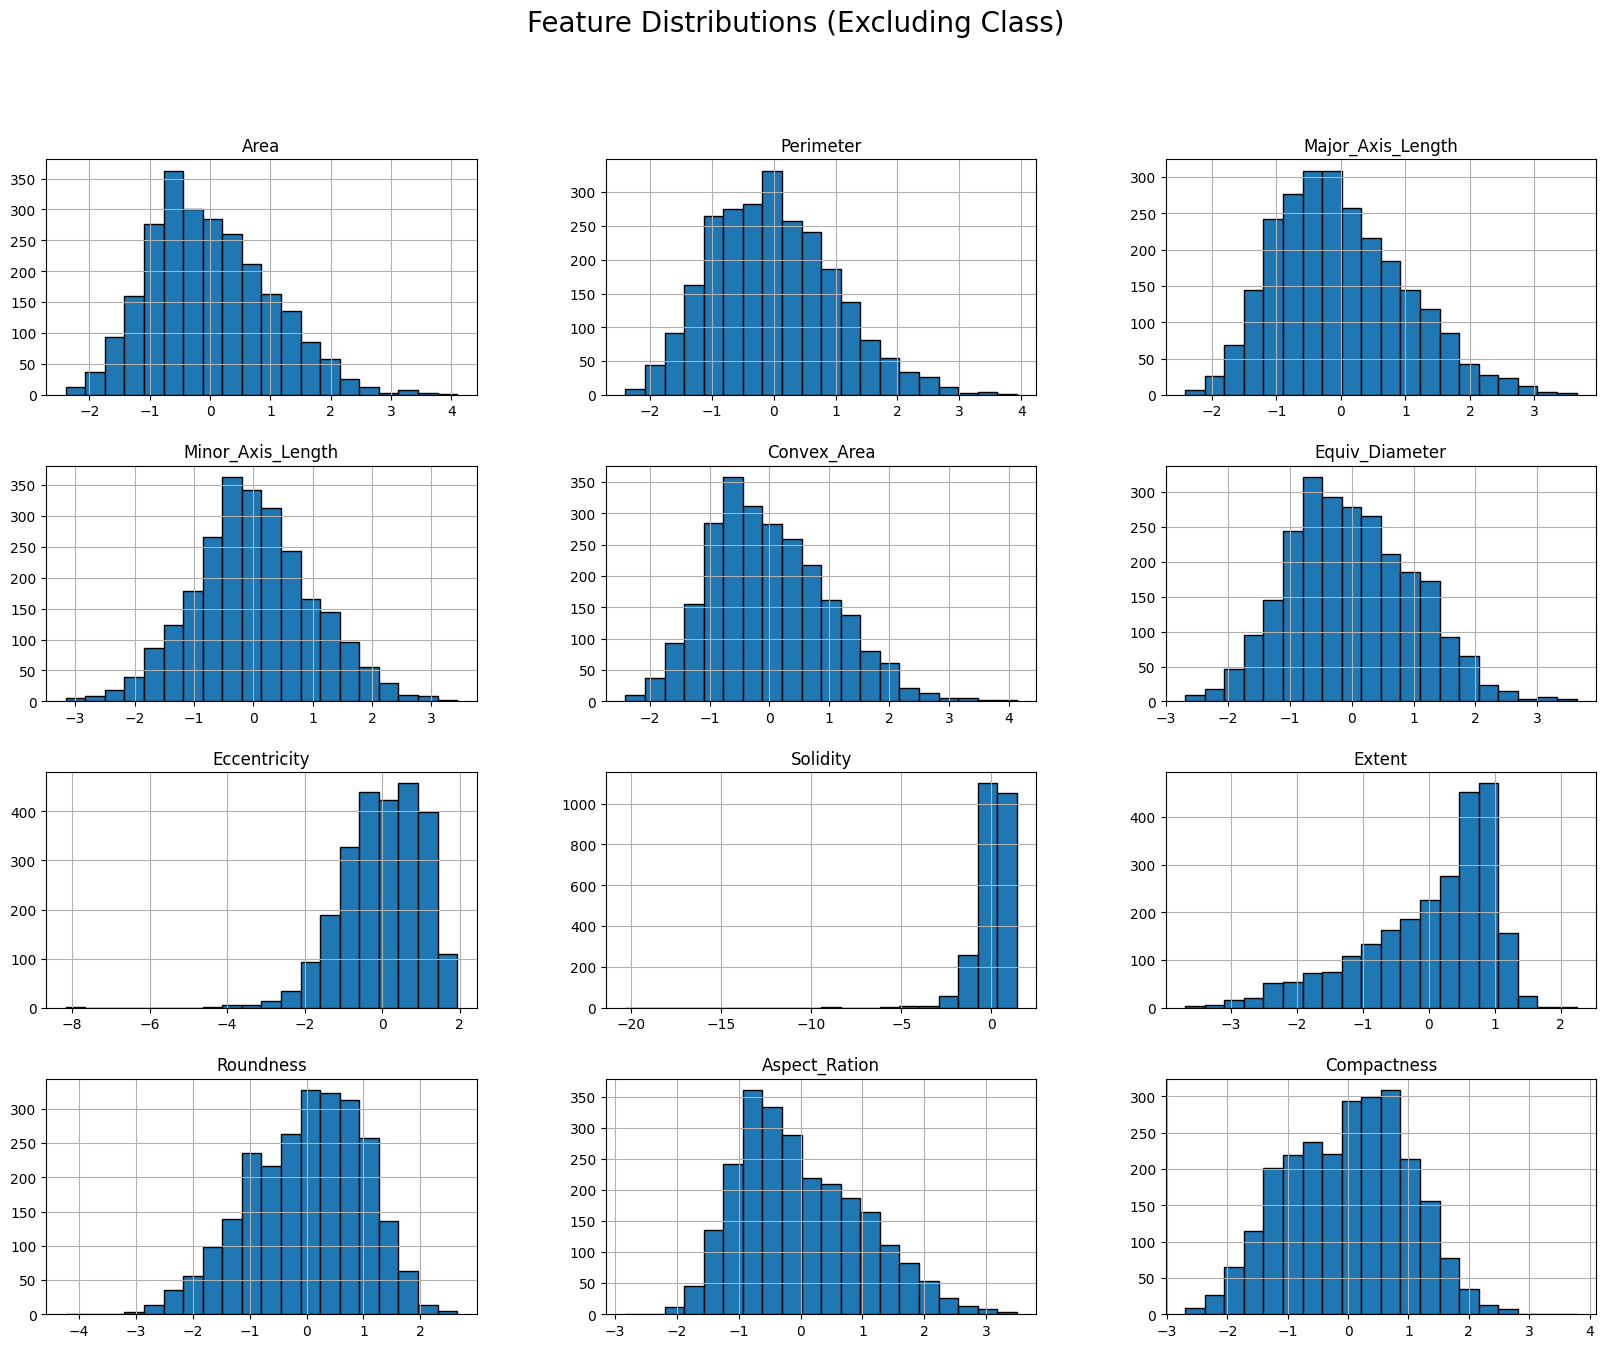

In [15]:
# Plot histograms for all numerical features
df.loc[:, df.columns != 'Class'].hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Feature Distributions (Excluding Class)", fontsize=20)
plt.show()

**Observations**:
   Features like `Area`, `Perimeter`, `Major_Axis_Length`, `Convex_Area`, and `Equiv_Diameter` show distributions that are nearly symmetrical, indicating that these features are well-represented across their ranges. Features such as `Extent`, `Eccentricity`, and `Solidity` are positively skewed, with most of values concentrated near the higher end of their range. Such skewness may impact models sensitive to feature distributions (e.g., logistic regression). Certain features, like `Roundness`, `Aspect_Ratio`, and `Compactness`, appear uniformly distributed, capturing diverse values. Some features, such as `Eccentricity` and `Solidity`, show potential outliers at the extremes. These can be verified and handled based on their impact on the models. This confirms the need for preprocessing the data through normalization or standardization for models sensitive to scale and distribution.

Check correlation between features.

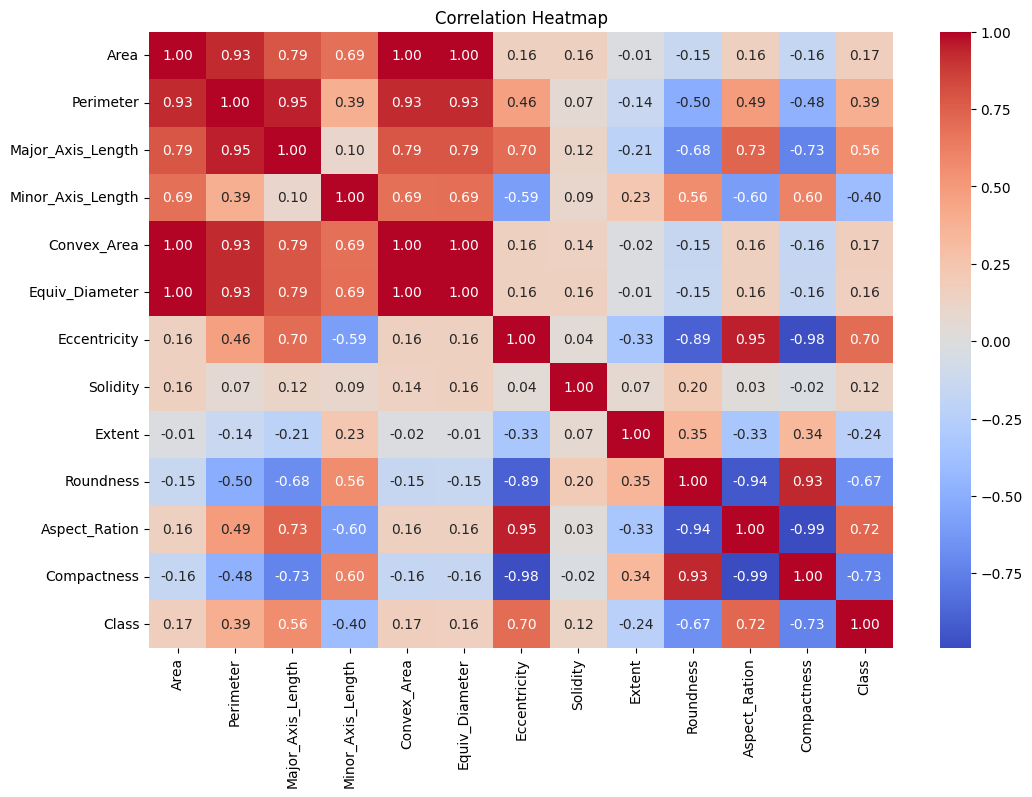

In [16]:
# correlation matrix
corr_matrix = df.corr()
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**Observations:** 
1. **High Correlation**:
   - There is a strong positive correlation between **`Area`, `Perimeter`, `Convex_Area`, `Equiv_Diameter`**. This shows redundancy, meaning they likely share similar information about seed size and shape.
   - The features **`Roundness`, `Aspect_Ratio`, `Compactness`**, are also highly correlated with each other, which indicates that they describe related geometric properties of the seed.
   - **`Eccentricity`** and **`Roundness`** exhibit a strong negative correlation. As a seed becomes moe elongated, its roundness decreases.
   
2. **Moderate Correlation**:
   - **`Eccentricity`** shows a moderate positive correlation with features like `Area` and `Perimeter`, but has weaker correlations with other features, implying that it captures a distinct aspect of seed shape (elongation vs. roundness).
   - **`Extent`** shows moderate positive correlations with `Solidity` and `Compactness`, suggesting these features are related to how "filled" or compact the seed is.

3. **Low Correlation**:
   - **`Solidity`** has a weak correlation with most other features, except for `Extent` and `Compactness`. It represents the seed's compactness and is less directly related to other shape features.


Features with strong positive correlations suggest potential redundancy so it would be better to do feature selection to reduce multicollinearity.


Visualize the relationship between features and the `Class` variable.

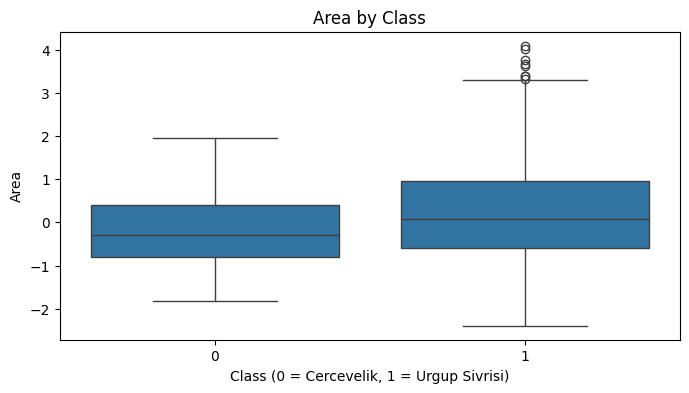

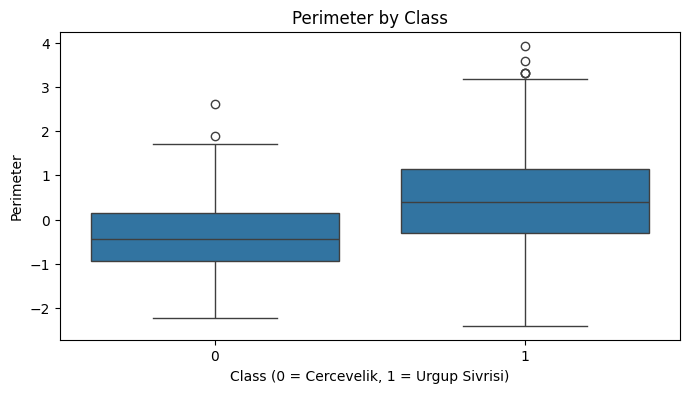

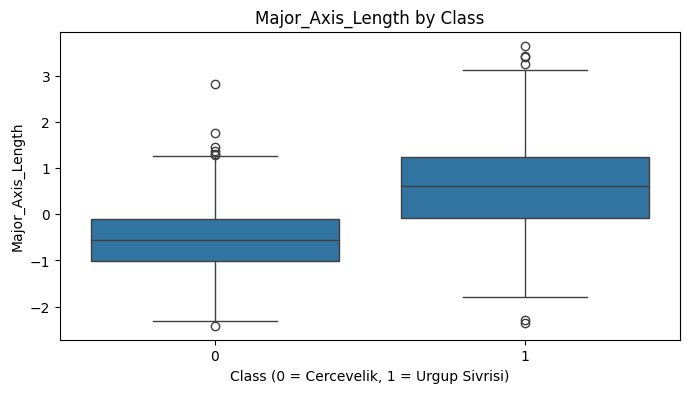

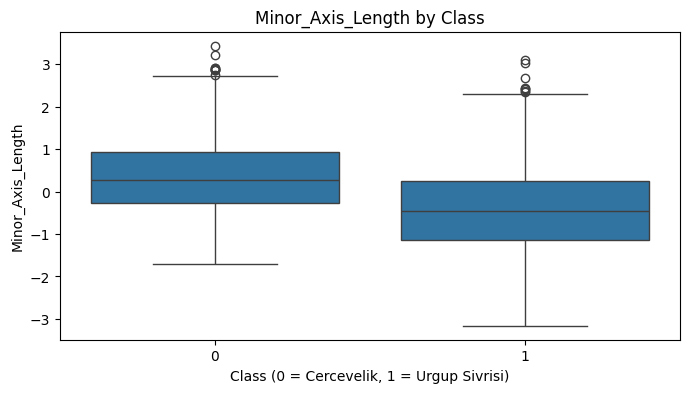

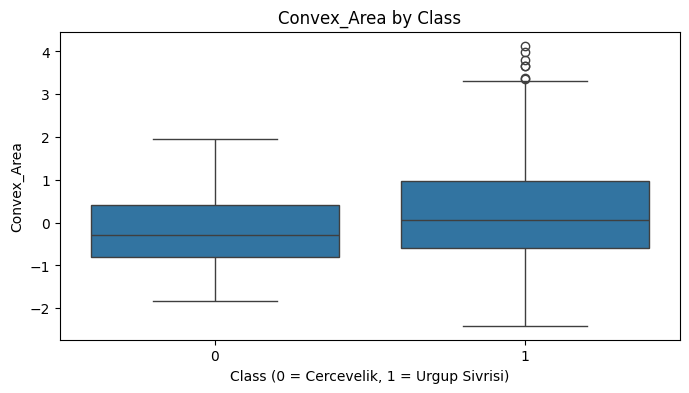

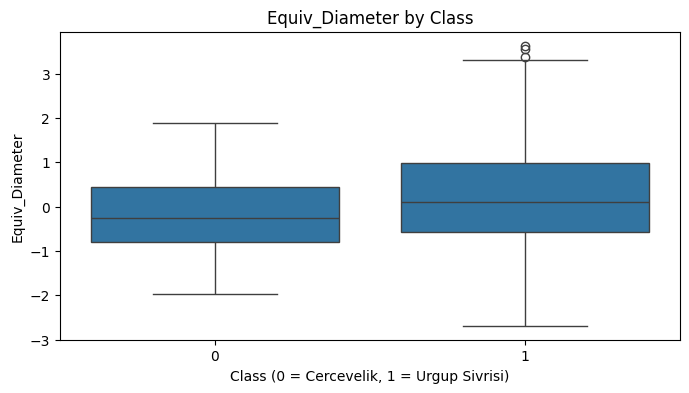

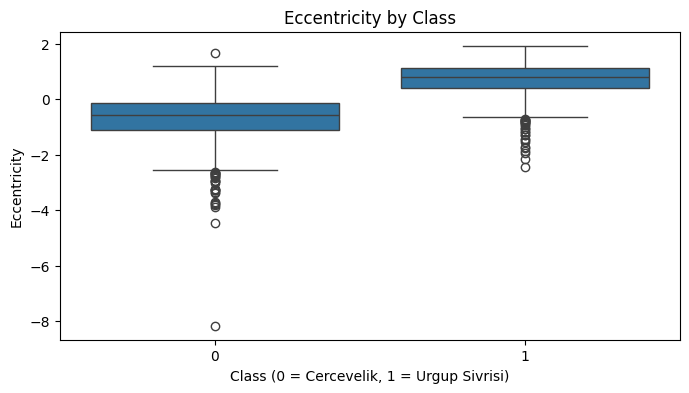

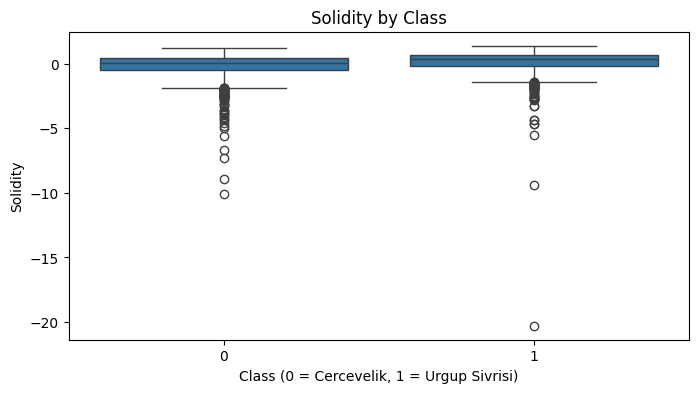

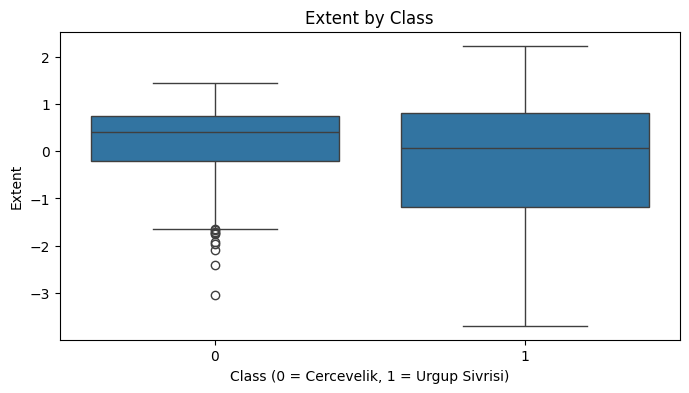

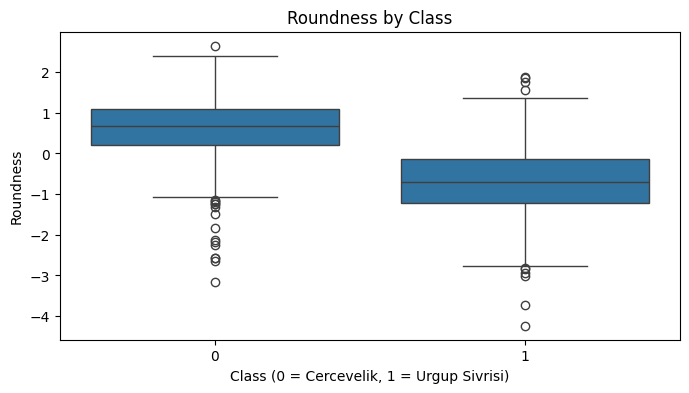

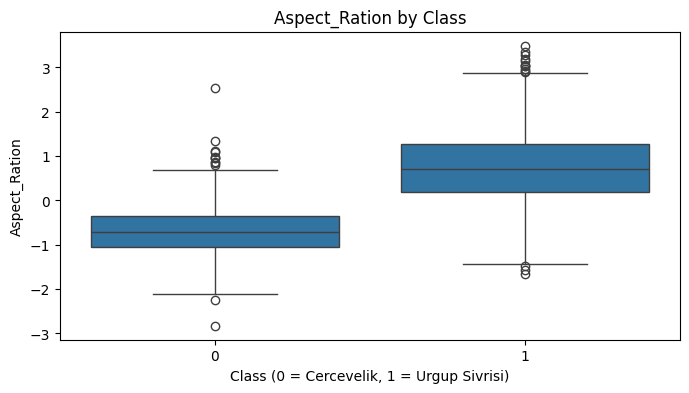

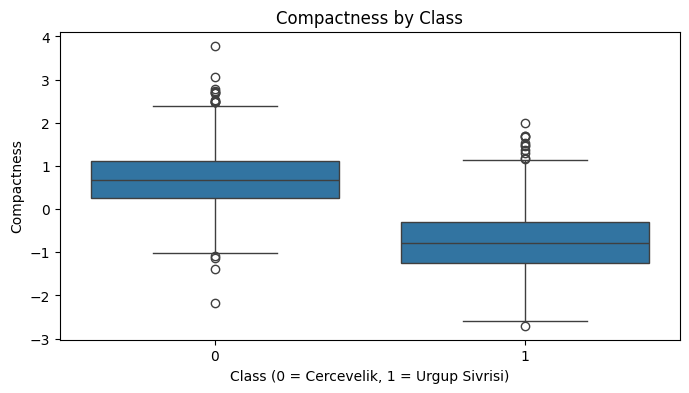

In [17]:
for col in df.columns[:-1]:  # Exclude 'Class'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f"{col} by Class")
    plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
    plt.ylabel(col)
    plt.show()

**Observations:** The key differences observed between the distribution of features between the two classes of pumpkin seeds are observed in features like `Area`, `Perimeter`, `Major Axis Length`, and `Convex Area`, with class 1 (Urgup Sivrisi) consistently showing larger values and greater variability. Additionally, shape-related features such as `Aspect Ratio` and `Eccentricity` indicate class 1 seeds are more elongated, while class 0 (Cercevelik) seeds are generally more compact and rounded. Other features do have overlapping distribution like `Solidity` and `Extent` which suggest that these may not be as effective in distinguishing between the two classes. Generally, this highlights the importance of size and shape features for effective classification.

Visualize pairwise feature relationships.

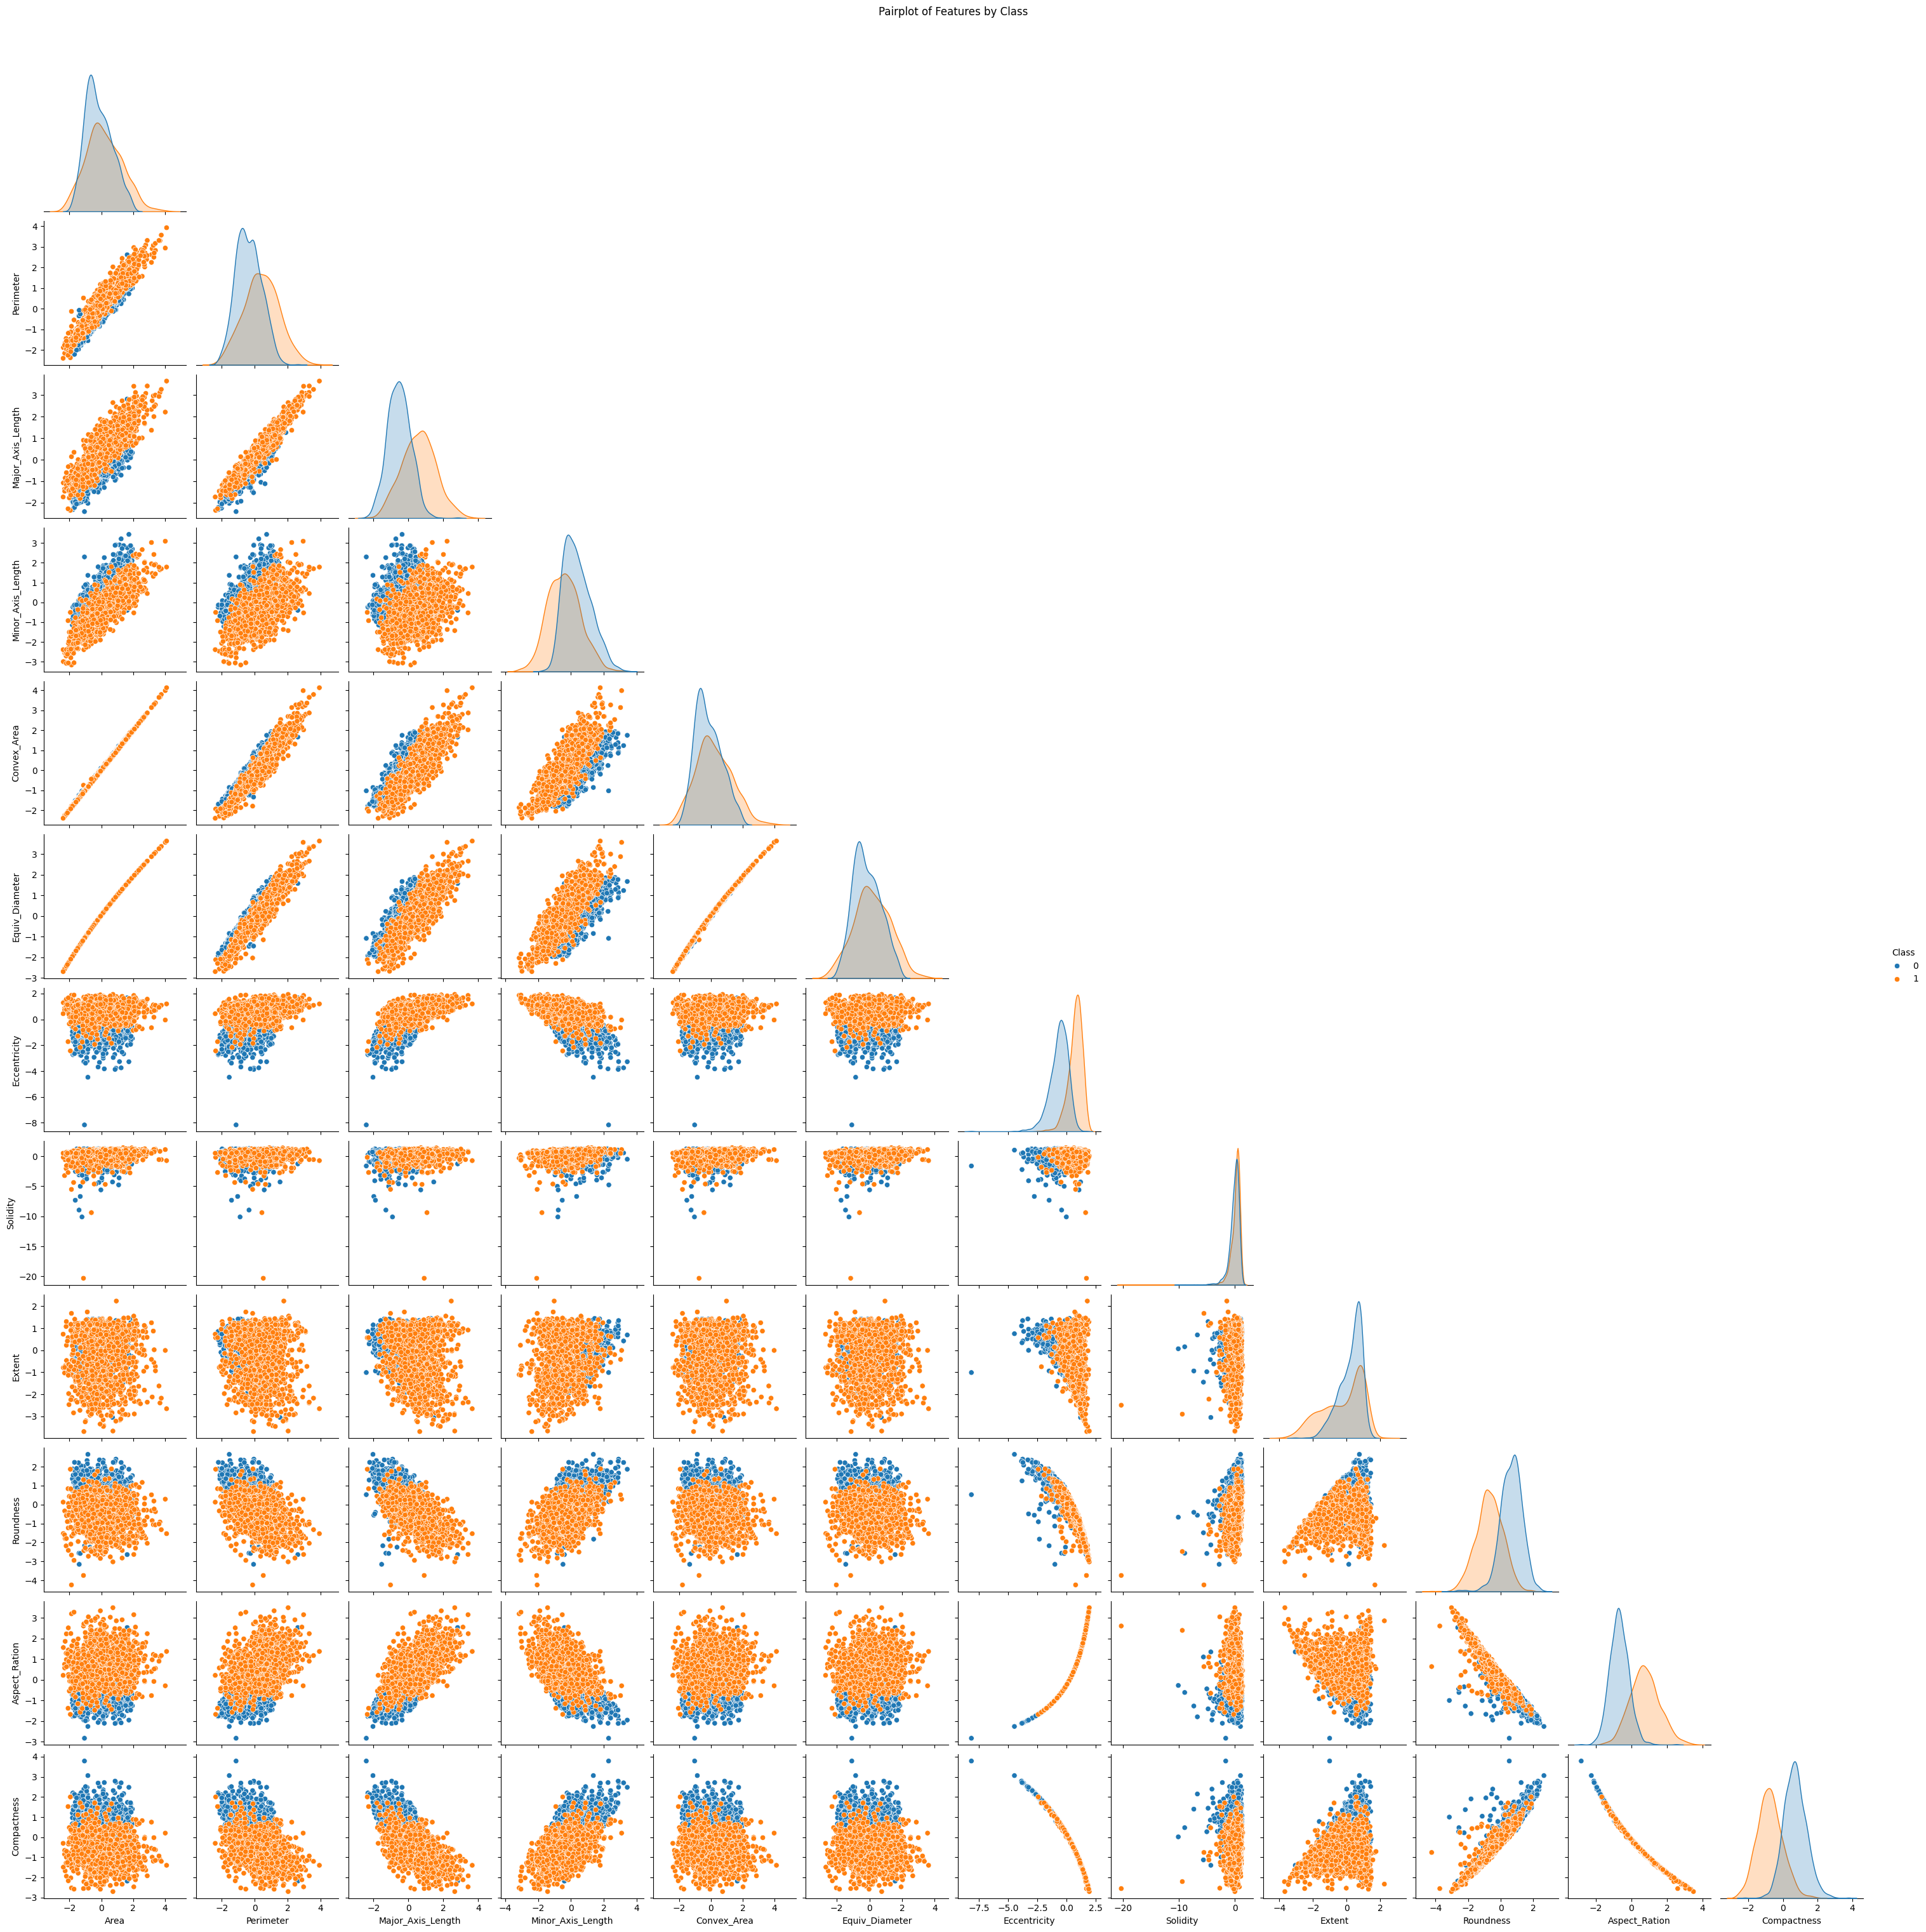

In [18]:
# pairwise relationships
sns.pairplot(df, hue='Class', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()


**Observations**: The key insights include clear separations between classes are visible in pairs like Major axis Length vs. Perimeter, suggesting that these can be effective for distinguishing between the two classes. Moreover, Major Axis Length vs. Equiv Diameter also shows separation with `Urgup Sivrisi` seeds having larger values (thus having larger size) compared to `Cercevelik` seeds. There are also overlapping features like `Solidity` and `Extent`, which suggests that these may not be as useful for classification. There are also strong correlations between features like `Area` and `Perimeter` which suggest potential redundancies. This can be addressed later with feature selection.

Overall, the EDA was able to provide insights into the structure of the dataset and the feature relationships. Key features such as `Major Axis Length` and `Area` show clear separation between the two classes, making them strong candidates for model training. Additionally, high correlations between features like `Area` and `Perimeter` suggest redundancy, while features such as `Solidity` and `Extent` may not be as useful for classification. The dataset also appears relatively balanced, with no immediate need for oversampling or undersampling. 

## Additional Preprocessing (Feature Selection)

Based on the EDA, a lot of features have high correlations between each other. This needs to be addressed because this may cause some redundancy when training the models. The solution for this is to drop redundant features

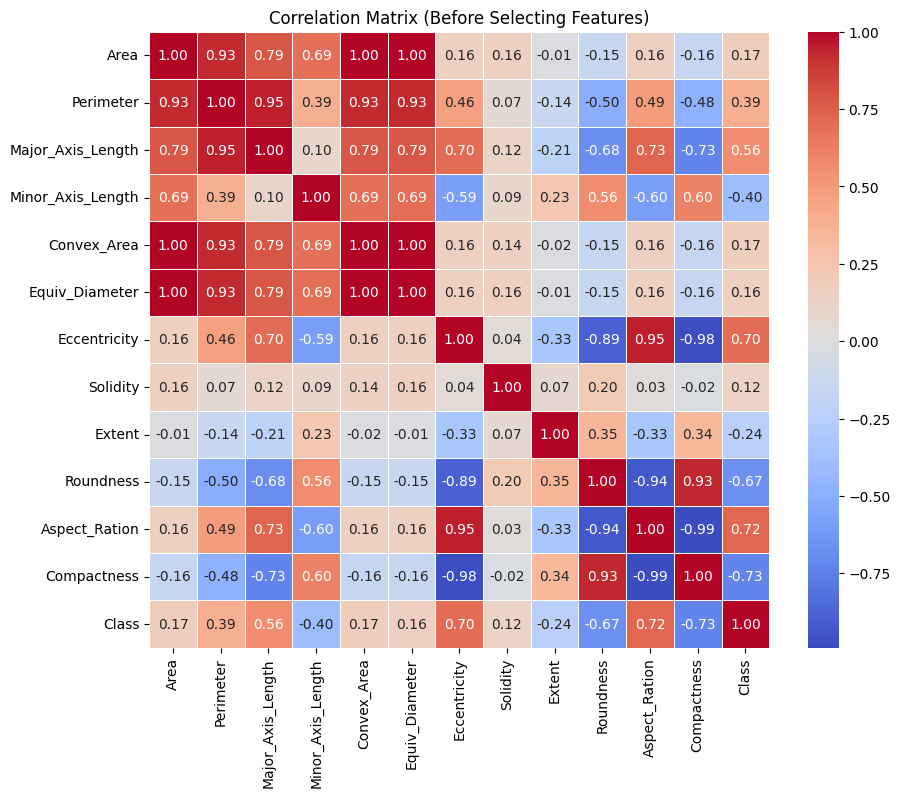

Area               Convex_Area       0.999806
Equiv_Diameter     Area              0.998464
Convex_Area        Equiv_Diameter    0.998289
Aspect_Ration      Eccentricity      0.950225
Major_Axis_Length  Perimeter         0.946181
Compactness        Roundness         0.933308
Perimeter          Convex_Area       0.929971
Area               Perimeter         0.928548
Perimeter          Equiv_Diameter    0.928055
dtype: float64
Reduced features:
Index(['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Roundness', 'Aspect_Ration', 'Solidity', 'Extent'],
      dtype='object')


In [19]:
# Show correlation matrix again
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Before Selecting Features)')
plt.show()

# Identify features with high correlation
high_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr[(high_corr > 0.90) & (high_corr < 1.0)]
print(high_corr_pairs)

# the features 'Convex_Area', 'Equiv_Diameter', 'Compactness', and 'Perimeter' will not be included to avoid redundancy.
selected_features = ['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness','Aspect_Ration','Solidity', 'Extent']

# Create a new dataframe with only the selected features
df_selected = df[selected_features]

print("Reduced features:")
print(df_selected.columns)

Pairs that are highly correlated with a threshold of 0.90+ needed for some features to be excluded. The features `Convex_Area`, `Equiv_Diameter`, `Compactness`, `Roundness`, `Perimeter` were dropped as they were too highly correlated with `Area` while also being similar regarding the information it provides. Features like `Aspect_Ration`, `Eccentricity`, and `Roundness` are kept despite its high correlation because it shows distinct relationships with the target class. These are valuable as they capture shape-specific unique aspects of seed shape that contribute to class distinction. Moreover, features like `Solidity` and `Extent` hav overlapping distributions across classes, which means that they probably will not be useful for distinguishing between the two classes.

In [20]:
# Do not include the less informative features 'Solidity', 'Extent'
selected_features = ['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness','Aspect_Ration']

df_selected = df[selected_features]

# Check the final dataset after removal
print("Remaining features:", df_selected.columns)

Remaining features: Index(['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Roundness', 'Aspect_Ration'],
      dtype='object')


The final datasets to be used for each model are: `df_knn` for KNN, `df_logistic` for Logistic Regression, and `df_trees` for Decision Trees.

In [21]:
# Logistic Regression dataset
df_logistic = df.copy()

# KNN dataset
df_knn = df.copy()

# Decision Trees dataset
df_tree = df.copy()

The data is now cleaned as follows:
- **`selected_features`** - List of reduced features to be used.
- **`df_selected`** - Dataframe containing only columns with the selected features.
- **`df`** - Original cleaned and standardized data.

After performing the exploratory data analysis (EDA) and feature selection, we have reduced the dataset to the most relevant features for model training. We can now move forward with training and evaluating the model.

# Section 6. Initial model training

## A. K Nearest Neighbor

K-Nearest Neighbors is an appropriate model for the dataset due to its ability to classify the seeds based on their distinct physical characteristics represented by numerical features. To start, the dataset containing 2500 instances is split into train dataset with 2000 instances, and test dataset with 500 instances.


In [22]:
X_knn = df_knn[selected_features]
y_knn = df_knn['Class']

In [23]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

print('Training data shape: ', X_train_knn.shape)
print('Training labels shape: ', y_train_knn.shape)
print('Test data shape: ', X_test_knn.shape)
print('Test labels shape: ', y_test_knn.shape)

Training data shape:  (2000, 6)
Training labels shape:  (2000,)
Test data shape:  (500, 6)
Test labels shape:  (500,)


In plotting the graph, **feature selection** is applied through the [random forest classifier](https://www.geeksforgeeks.org/feature-selection-using-random-forest/) in order to reduce the dimensionality of the dataset in the graph, making it easier to observe possible grouping behaviors. By focusing on the most relevant features, the graph becomes more interpretable.

In [24]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_knn, y_train_knn)

accuracy_before = rf.score(X_test_knn, y_test_knn)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

# Get feature importance
importances = rf.feature_importances_
feature_names = X_train_knn.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Accuracy before feature selection: 0.86
             Feature  Importance
5      Aspect_Ration    0.280960
3       Eccentricity    0.275516
4          Roundness    0.157998
1  Major_Axis_Length    0.142131
2  Minor_Axis_Length    0.081860
0               Area    0.061534


The features '**Aspect_Ration**' and '**Eccentricity**' are considered to be the two most important features having an importance of 0.280960 and 0.275516 respectively.

In [25]:
top_n_knn = 2
top_features = feature_importance_df['Feature'][:top_n_knn].values
print(top_features)

['Aspect_Ration' 'Eccentricity']


For plotting, the top two most important features are only considered to check the relationship of the variables.

In [26]:
X_train_top_2 = X_train_knn[top_features]
X_test_top_2 = X_test_knn[top_features]
print(X_train_top_2.shape, X_test_top_2.shape)

(2000, 2) (500, 2)


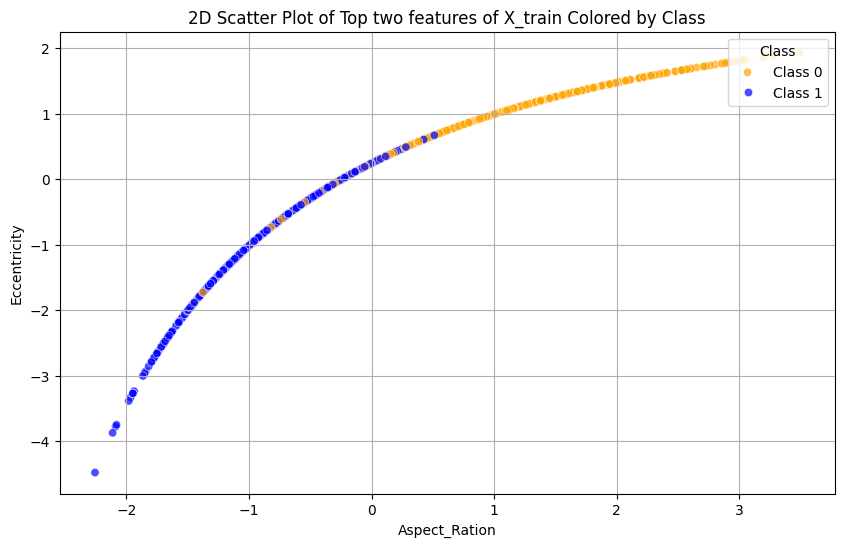

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_top_2, x=X_train_top_2.columns[0], y=X_train_top_2.columns[1], hue=y_train_knn, palette={0: 'blue', 1: 'orange'}, alpha=0.7)

plt.title('2D Scatter Plot of Top two features of X_train Colored by Class')
plt.xlabel(X_train_top_2.columns[0])
plt.ylabel(X_train_top_2.columns[1])
plt.legend(title='Class', loc='upper right', labels=['Class 0', 'Class 1'])
plt.grid(True)
plt.show()

For the initial testing of the dataset, the hyperparameter *k* neighbors is arbitrarily set to 2 to quickly observe the basic functionality and performance of the KNN model.

In [28]:
X_train_knn.columns

Index(['Area', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity',
       'Roundness', 'Aspect_Ration'],
      dtype='object')

In [29]:
k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_knn, y_train_knn)
y_predicted_knn = model.predict(X_test_knn)

In [30]:
comparison_df = pd.DataFrame({
    'Actual': y_test_knn,
    'Predicted': y_predicted_knn
})

print(comparison_df.head(20))

      Actual  Predicted
1447       1          1
1114       0          1
1064       0          0
2287       1          1
1537       1          1
668        0          0
1583       1          1
2404       1          1
497        0          0
2480       1          1
471        0          0
246        0          0
923        0          1
1131       0          0
670        0          0
916        0          0
1414       1          1
1606       1          1
402        0          0
1103       0          0


## B. Logistic Regression

REFERENCE: [Logistic Regression: Sklearn\Scikit](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

In [31]:
##import logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# training (70%) and testing (30%)
x_train_logistic, x_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.3, random_state=1 #CAPITAL X
)

model_logistic = LogisticRegression() #create model
model_logistic.fit(x_train_logistic, y_train_logistic) #train on TRAINING data

#test data to make predictions (evaluate model)
y_pred_logistic = model_logistic.predict(x_test_logistic) #predictions via test

#evaluate (accuracy, confusion matrix, and classification report)
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)  #predicted vs actual for test data
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic) 
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)  

# Confusion matrix results for the test set
true_positives_0 = conf_matrix_logistic[0, 0]  # Cercevelik 
false_negatives_0 = conf_matrix_logistic[0, 1]  # NOT Cercevelik 
true_positives_1 = conf_matrix_logistic[1, 1]  # Urgup Sivrisi 
false_negatives_1 = conf_matrix_logistic[1, 0]  # NOT Urgup Sivrisi

conf_matrix_df = pd.DataFrame(
    conf_matrix_logistic,
    index=["Actual Cercevelik", "Actual Urgup Sivrisi"],
    columns=["Predicted Cercevelik", "Predicted Urgup Sivrisi"],
)

most_correctly_identified = (
    "Cercevelik" if true_positives_0 > true_positives_1 else "Urgup Sivrisi"
)

# Print the results
print("### Initial Logistic Regression Model Training Results ###")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%\n")

print("Logistic Regression Confusion Matrix:")
print(conf_matrix_df) 

print("\nClassification Report:")
print(class_report_logistic)  

print("\n### Result Summary ###")
print(f"True Positives for Cercevelik: {true_positives_0}")
print(f"True Positives for Urgup Sivrisi: {true_positives_1}")
print(f"Most correctly identified pumpkin type: {most_correctly_identified}")
print(
    f"Cercevelik correctly classified: {true_positives_0} out of {conf_matrix_logistic[0].sum()} ({(true_positives_0 / conf_matrix_logistic[0].sum()) * 100:.2f}%)"
)
print(
    f"Urgup Sivrisi correctly classified: {true_positives_1} out of {conf_matrix_logistic[1].sum()} ({(true_positives_1 / conf_matrix_logistic[1].sum()) * 100:.2f}%)"
)


### Initial Logistic Regression Model Training Results ###
Accuracy: 86.80%

Logistic Regression Confusion Matrix:
                      Predicted Cercevelik  Predicted Urgup Sivrisi
Actual Cercevelik                      336                       43
Actual Urgup Sivrisi                    56                      315

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       379
           1       0.88      0.85      0.86       371

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750


### Result Summary ###
True Positives for Cercevelik: 336
True Positives for Urgup Sivrisi: 315
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 336 out of 379 (88.65%)
Urgup Sivrisi correctly classified: 315 out of 371 (84.91%)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Training Result Summary ####
True Positives for Cercevelik: 341
True Positives for Urgup Sivrisi: 315
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 341 out of 379 (89.97%)
Urgup Sivrisi correctly classified: 315 out of 371 (84.91%)

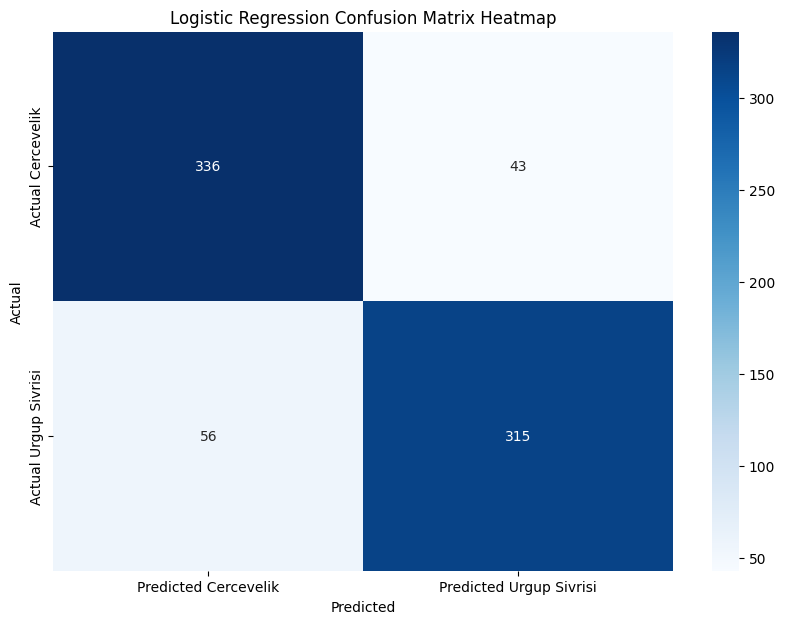

In [33]:
#confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## C. Decision Trees

#### Load and Preprocess Dataset

Loads the dataset, encodes categorical class labels into numerical values, and splits the data into training and testing sets for model building.

In [34]:
X_dt = df_tree[selected_features]
y_dt = df_tree['Class']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)

#### Train Simplified Decision Tree

Trains a decision tree with limited depth to prevent overfitting and ensure a simple initial structure.

In [35]:
from sklearn.tree import DecisionTreeClassifier
simplified_tree_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
simplified_tree_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [36]:
simplified_y_pred_dt = simplified_tree_dt.predict(X_test_dt)
simplified_accuracy_dt = accuracy_score(y_test_dt, simplified_y_pred_dt)
simplified_classification_report_dt = classification_report(y_test_dt, simplified_y_pred_dt)

print("\nAccuracy (Simplified Tree):", simplified_accuracy_dt)
print("Classification Report (Simplified Tree):\n", simplified_classification_report_dt)


Accuracy (Simplified Tree): 0.876
Classification Report (Simplified Tree):
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       260
           1       0.87      0.87      0.87       240

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



#### Describe the Tree Structure
Provides a detailed textual representation of the decision tree, including its nodes, splits, and thresholds

In [37]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(f"The binary tree structure has {n_nodes} nodes and the following structure:\n")
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                f"{node_depth[i] * '\t'}node={i} is a leaf node, values: {values[i]}."
            )
        else:
            print(
                f"{node_depth[i] * '\t'}node={i} is a split node: "
                f"go to node {children_left[i]} if X[:, {feature[i]}] <= {threshold[i]} "
                f"else to node {children_right[i]}."
            )


print("Description of the Simplified Tree Structure:")
describe_tree(decision_tree_limited)

Description of the Simplified Tree Structure:


NameError: name 'decision_tree_limited' is not defined

#### Visualize the Tree with Graphviz
Generates a visual diagram of the simplified decision tree, highlighting its structure and decision paths.



In [ ]:
from sklearn.tree import export_graphviz  # For exporting the tree
from io import StringIO  # For creating an in-memory text stream
import pydotplus  # For creating and visualizing the graph
from IPython.display import Image  # For displaying the image in Jupyter

decision_tree_full = DecisionTreeClassifier(random_state=42)
decision_tree_full.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(
    decision_tree_full,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=selected_features,  # Explicitly pass the correct feature names
    class_names=list(map(str, label_encoder.classes_))
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("full_depth_tree.png")
Image(graph.create_png())


#### Train, Visualize, and Evaluate Full-Depth Decision Tree
Trains a full-depth decision tree, describes its structure, and evaluates its performance to compare with the simplified model.

In [ ]:
# Train the full-depth decision tree
decision_tree_full = DecisionTreeClassifier(random_state=42)
decision_tree_full.fit(X_train, y_train)

# Describe the full-depth tree structure
print("\nDescription of the Full-Depth Tree Structure:")
describe_tree(decision_tree_full)

# Evaluate the full-depth tree
full_y_pred = decision_tree_full.predict(X_test)
full_accuracy = accuracy_score(y_test, full_y_pred)
full_classification_report = classification_report(y_test, full_y_pred)

print("\nAccuracy (Full Depth Tree):", full_accuracy)
print("Classification Report (Full Depth Tree):\n", full_classification_report)


def visualize_tree(decision_tree, feature_names, class_names, file_name):
    dot_data = StringIO()
    export_graphviz(
        decision_tree,
        out_file=dot_data,
        filled=True,
        rounded=True,
        special_characters=True,
        feature_names=feature_names,
        class_names=class_names,
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(file_name)
    print(f"Tree visualization saved as: {file_name}")
    return Image(graph.create_png())


# Visualize the full-depth tree
print("\nVisualizing Full-Depth Decision Tree...")
image = visualize_tree(
    decision_tree=decision_tree_full,
    feature_names=X.columns,
    class_names=list(map(str, label_encoder.classes_)),
    file_name="full_depth_tree.png"
)
image

#### Cross-Validation for Robust Performance Estimation
Performs k-fold cross-validation to validate the consistency and reliability of the full-depth decision tree's performance.

In [ ]:
cv_scores_dt = cross_val_score(full_tree_dt, X_dt, y_dt, cv=5)
print("\nCross-Validation Scores:", cv_scores_dt)
print("Mean Cross-Validation Score:", cv_scores_dt.mean())

# Section 7. Error analysis

## A. K Nearest Neighbor

For the initial model performance, the classification report for the model indicates the following key metrics:

**Precision**: The model is more precise for the Urgup Sivrisi class (0.89) compared to the Cercevelik class (0.78). This suggests that when the model predicts Urgup Sivrisi, it is more likely to be correct than when it predicts Cercevelik.

**Recall**: The model recalls the majority of Cercevelik instances correctly (0.91) but struggles with Urgup Sivrisi (0.74). This means the model misses more instances of Urgup Sivrisi than Cercevelik.

**F1-Score**: Balancing precision and recall, the Cercevelik class achieves a higher F1-score (0.84) than the Urgup Sivrisi class (0.81).

**Overall Accuracy**: The model achieves 83% accuracy across the dataset, demonstrating a good initial performance even by considering only the top two most important features.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_knn = classification_report(y_test_knn, y_predicted_knn, target_names=['Cercevelik', 'Urgup Sivrisi'])
print(f"Report: {confusion_knn}")

confusion_knn = confusion_matrix(y_test_knn, y_predicted_knn)
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Through the confusion matrix, we could identify problematic areas of each classes.

**Cercevelik**: The high recall (0.91) indicates most instances are correctly classified, but the lower precision (0.78) reveals a tendency to misclassify other classes as Cercevelik.

**Urgup Sivrisi**: The lower recall (0.74) indicates many instances of Urgup Sivrisi are misclassified, which may impact applications requiring high sensitivity for this class.

## B. Logistic Regression

Performance Metrics:

1. Precision: The model is more precise for the Urgup Sivrisi class (0.89) compared to the Cercevelik class (0.86).
- The model predicts Urgup Sivrisi more accurately than Cercevelik.
2. Recall: The model recalls the majority of Cercevelik instances correctly (0.90) but struggles slightly more with Urgup Sivrisi (0.85). 
- This means the model misses more instances of Urgup Sivrisi than Cercevelik.
3. F1-Score: The F1-score balances precision and recall. The Cercevelik class achieves a slightly higher F1-score (0.88) compared to the Urgup Sivrisi class (0.87).
- Slightly better performance with Cercevelik than Urgup Sivrisi.
4. Overall Accuracy: The model achieves a good initial training performance with 87.33% accuracy across the entire dataset.

## C. Decision Tree


Performance Metrics:

Overall Accuracy (82.6%)
The model achieves strong performance, correctly classifying 82.6% of all instances.

Precision
The model predicts Cercevelik (0.84) more confidently than Urgup Sivrisi (0.81), with fewer false positives overall.

Recall
Recall for Cercevelik (0.82) and Urgup Sivrisi (0.83) indicates the model captures true positives consistently for both classes.

F1-Score
The balanced F1-scores of 0.83 for both classes confirm the model's effectiveness in managing precision and recall.

In [ ]:
# Generate the confusion matrix
confusion_dt_matrix = confusion_matrix(y_test_dt, y_pred_dt)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_dt_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that Class 0 (Cercevelik) has 230 correctly classified instances and 30 misclassified as Class 1. Class 1 (Urgup Sivrisi) has 208 correctly classified instances and 32 misclassified as Class 0. Overall, the model performs well but struggles slightly with distinguishing between the two classes.

# Section 8. Improving model performance

## A. K Nearest Neighbor

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 12, 15, 20, 40, 60, 100],
}
knn = KNeighborsClassifier()

In [ ]:
# Grid Search for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='f1', return_train_score=True)
knn_grid_search.fit(X_train_knn, y_train_knn)

The following table and barplot summarizes the performance of the KNN model based on different configurations of the n_neighbors hyperparameter, evaluated using the F1 Score.


The following visualization shows n_neighbors set to 7 yields the highest F1 score of 0.874677. While, n_neighbors set to 1 yields the lowest with the score of 0.835661.

In [ ]:
results_df_knn = pd.DataFrame(knn_grid_search.cv_results_)

performance_df_knn = results_df_knn[['param_n_neighbors', 'mean_test_score']]
performance_df_knn.columns = ['n_neighbors', 'F1 Score']
performance_df_knn = performance_df_knn.sort_values(by='F1 Score', ascending=False)

print("\nHyperparameter Configurations and Corresponding Performance:")
print(performance_df_knn)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df_knn, x='F1 Score', y='n_neighbors')  # Removed palette
plt.title('KNN Hyperparameter Performance')
plt.xlabel('F1 Score')
plt.ylabel('Number of Neighbors')

current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks[::1], rotation=45)

plt.tight_layout()
plt.show()

The optimized KNN model where *k* is set to 7, achieves an overall accuracy of 87%. The classification report shows improved performance for both classes, with precision and recall scores of 0.85 and 0.89 for Cercevelik, and 0.88 and 0.85 for Urgup Sivrisi, respectively. The F1-scores for both classes are also improved, with Cercevelik at 0.87 and Urgup Sivrisi at 0.86.

In [ ]:
# Evaluate KNN
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)
y_predictions_knn = knn_best_model.predict(X_test_knn)
print("KNN Performance:")
print(classification_report(y_test_knn, y_predictions_knn, target_names=['Cercevelik', 'Urgup Sivrisi']))

# Confusion Matrix
confusion_knn = confusion_matrix(y_test_knn, y_predictions_knn)
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## B. Logistic Regression

**NOTE:** ~20-1m runtime for below: (ON MY PC so if laptop might take a long time)
- if significantly slow reduce max_iter size seen above
- will give warning but accuracy for the most part stayed similiar

In [ ]:
##random state for grid search
import random
seed = 1
np.random.seed(seed)
random.seed(seed)

In [92]:
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

#for reproducibility in output
seed = 12381
np.random.seed(seed)
random.seed(seed)

# Initialize the logistic regression model with a fixed random state
model_logistic_optimized = LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear', random_state=seed)

# Filter the dataset to only include the selected features
x_train_logistic_selected = x_train_logistic[selected_features]
x_test_logistic_selected = x_test_logistic[selected_features]

# Parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 1, 25, 50, 75, 100,120, 125, 130, 150, 175]
,  #regularization strength
    'solver': ['liblinear'],  
    'penalty': ['l1'],  # LASSO
}

# Stratified cross-validation with a fixed random state
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Find the best hyperparameters using GridSearchCV
grid_search = GridSearchCV(estimator=model_logistic_optimized, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_search.fit(x_train_logistic_selected, y_train_logistic)

# Best model from GridSearchCV
best_model_logistic = grid_search.best_estimator_
y_pred_logistic = best_model_logistic.predict(x_test_logistic_selected)

# Evaluation
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

# Confusion matrix analysis
true_positives_0 = conf_matrix_logistic[0, 0]  # Cercevelik
false_negatives_0 = conf_matrix_logistic[0, 1]  # NOT Cercevelik
true_positives_1 = conf_matrix_logistic[1, 1]  # Urgup Sivrisi
false_negatives_1 = conf_matrix_logistic[1, 0]  # NOT Urgup Sivrisi

conf_matrix_df = pd.DataFrame(
    conf_matrix_logistic, index=["Actual Cercevelik", "Actual Urgup Sivrisi"],
    columns=["Predicted Cercevelik", "Predicted Urgup Sivrisi"]
)

most_correctly_identified = "Cercevelik" if true_positives_0 > true_positives_1 else "Urgup Sivrisi"
print("### Optimized Logistic Regression Model with RFE and GridSearchCV ###")
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%\n")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_df)
print("\nClassification Report:")
print(class_report_logistic)
print("\n### Result Summary ###")
print(f"True Positives for Cercevelik: {true_positives_0}")
print(f"True Positives for Urgup Sivrisi: {true_positives_1}")
print(f"Most correctly identified pumpkin type: {most_correctly_identified}")
print(f"Cercevelik correctly classified: {true_positives_0} out of {conf_matrix_logistic[0].sum()} "
      f"({(true_positives_0 / conf_matrix_logistic[0].sum()) * 100:.2f}%)")
print(f"Urgup Sivrisi correctly classified: {true_positives_1} out of {conf_matrix_logistic[1].sum()} "
      f"({(true_positives_1 / conf_matrix_logistic[1].sum()) * 100:.2f}%)")


### Optimized Logistic Regression Model with RFE and GridSearchCV ###
Best Hyperparameters from GridSearchCV: {'C': 125, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 87.33%

Logistic Regression Confusion Matrix:
                      Predicted Cercevelik  Predicted Urgup Sivrisi
Actual Cercevelik                      337                       42
Actual Urgup Sivrisi                    53                      318

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       379
           1       0.88      0.86      0.87       371

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750


### Result Summary ###
True Positives for Cercevelik: 337
True Positives for Urgup Sivrisi: 318
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 337 out of 379 (88.92%)
Urgup Sivrisi correctly

### Optimized Logistic Regression Model with RFE and GridSearchCV ###
Best Hyperparameters from GridSearchCV: {'C': 125, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 87.33%

Logistic Regression Confusion Matrix:
                      Predicted Cercevelik  Predicted Urgup Sivrisi
Actual Cercevelik                      337                       42
Actual Urgup Sivrisi                    53                      318

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       379
           1       0.88      0.86      0.87       371

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750


### Result Summary ###
True Positives for Cercevelik: 337
True Positives for Urgup Sivrisi: 318
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 337 out of 379 (88.92%)
Urgup Sivrisi correctly classified: 318 out of 371 (85.71%)

# Decision Trees

## C. Improving model performance

#### Detailed Tree Analysis for Single Models
Visualizing the decision tree provides a graphical representation of its structure, including splits, thresholds, and feature usage. This complements the textual decision rules and enhances interpretability.


In [ ]:
def visualize_tree_with_graphviz(decision_tree, feature_names, class_names, file_name):

    from sklearn.tree import export_graphviz
    from IPython.display import Image
    import pydotplus
    from io import StringIO

    # Generate the DOT data
    dot_data = StringIO()
    export_graphviz(
        decision_tree,
        out_file=dot_data,
        filled=True,
        rounded=True,
        special_characters=True,
        feature_names=feature_names,
        class_names=class_names
    )

    # Generate the graph from DOT data
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # Save the graph as a PNG file
    graph.write_png(file_name)
    print(f"Tree visualization saved as: {file_name}")

    # Display the image inline (for Jupyter Notebook)
    return Image(graph.create_png())

# Example Usage
print("\nVisualizing Regularized Decision Tree...")
image = visualize_tree_with_graphviz(
    decision_tree=regularized_tree,
    feature_names=X.columns,
    class_names=list(label_encoder.classes_),
    file_name="regularized_tree.png"
)

# Display the image inline
image


#### Training and Visualizing Decision Trees for Regularization Analysis
This step focuses on analyzing the impact of regularization parameters (like maximum tree depth) on the decision tree's structure and performance. By training and visualizing decision trees with varying depths, you can observe how the model adapts to constraints and how these constraints affect overfitting or underfitting.



In [ ]:
def visualize_trees_with_depths(depths, X_train, y_train, feature_names, class_names, base_file_name="decision_tree_depth"):
    from sklearn.tree import export_graphviz
    from IPython.display import Image
    import pydotplus
    from io import StringIO

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        dot_data = StringIO()
        export_graphviz(
            model,
            out_file=dot_data,
            filled=True,
            rounded=True,
            special_characters=True,
            feature_names=feature_names,
            class_names=[str(c) for c in class_names]
        )


        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


        file_name = f"{base_file_name}_{depth}.png"
        graph.write_png(file_name)
        print(f"Tree visualization for max_depth={depth} saved as: {file_name}")


        display(Image(graph.create_png()))

# Example Usage
max_depths = [2, 4, 6, 10]
print("\nVisualizing Decision Trees with Varying Depths...")
visualize_trees_with_depths(
    depths=max_depths,
    X_train=X_train,
    y_train=y_train,
    feature_names=X.columns,
    class_names=random_search.best_estimator_.classes_,
    base_file_name="decision_tree_depth"
)


#### Load and Preprocess Dataset

In [ ]:
label_encoder = LabelEncoder()
df_tree['Class'] = label_encoder.fit_transform(df_tree['Class'])

X_dt = df_tree.drop(columns=['Class'])
y_dt = df_tree['Class']

smote = SMOTE(random_state=42)
X_resampled_dt, y_resampled_dt = smote.fit_resample(X_dt, y_dt)

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_resampled_dt, y_resampled_dt, test_size=0.2, random_state=42, stratify=y_resampled_dt
)

#### Feature Engineering

In [ ]:
scaler = StandardScaler()
X_train_scaled_dt = scaler.fit_transform(X_train_dt)
X_test_scaled_dt = scaler.transform(X_test_dt)

# Dimensionality Reduction using PCA (optional)
pca = PCA(n_components=5)
X_train_pca_dt = pca.fit_transform(X_train_scaled_dt)
X_test_pca_dt = pca.transform(X_test_scaled_dt)

### Hyperparameter Tuning
Randomized search is computationally efficient compared to grid search. The chosen parameters reflect a balance between exploration (e.g., wide range of depths) and domain knowledge (e.g., fewer samples required for split in small datasets). This ensured robust tuning while avoiding overfitting.

In [ ]:
param_dist_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_leaf_nodes": [None, 10, 20, 50]
}

# Perform RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=5,
    random_state=42
)
random_search_dt.fit(X_train_dt, y_train_dt)

# Best Decision Tree Model
best_dt = random_search_dt.best_estimator_
train_accuracy_dt = accuracy_score(y_train_dt, best_dt.predict(X_train_dt))
test_accuracy_dt = accuracy_score(y_test_dt, best_dt.predict(X_test_dt))

print("Best Decision Tree Performance:")
print(f"Training Accuracy: {train_accuracy_dt:.2f}")
print(f"Testing Accuracy: {test_accuracy_dt:.2f}")

# Cross-Validation Scores
cv_scores_dt = cross_val_score(best_dt, X_train_dt, y_train_dt, cv=5)
print(f"\nCross-Validation Accuracy for Best Decision Tree: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

# Feature Importance
feature_importances_dt = pd.DataFrame({
    "Feature": X_train_dt.columns,
    "Importance": best_dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances for Best Decision Tree:\n", feature_importances_dt)

# Optional: Comparison with shallow decision tree and Random Forest
shallow_tree_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree_dt.fit(X_train_dt, y_train_dt)
shallow_test_accuracy_dt = accuracy_score(y_test_dt, shallow_tree_dt.predict(X_test_dt))
print(f"Shallow Decision Tree Testing Accuracy: {shallow_test_accuracy_dt:.2f}")

rf_dt = RandomForestClassifier(random_state=42, n_estimators=100)
rf_dt.fit(X_train_dt, y_train_dt)
rf_test_accuracy_dt = accuracy_score(y_test_dt, rf_dt.predict(X_test_dt))
print(f"Random Forest Testing Accuracy: {rf_test_accuracy_dt:.2f}")

### Cross-Validation

In [ ]:
cv_scores_dt = cross_val_score(best_dt, X_dt, y_dt, cv=5)  # Use best_decision_tree
print(f"\nCross-Validation Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

#### Visualize Feature Importances


In [ ]:
feature_importance_rf_dt = pd.DataFrame({
    'Feature': X_train_dt.columns,
    'Importance': rf_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):\n", feature_importance_rf_dt)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf_dt['Feature'], feature_importance_rf_dt['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Section 9. Model performance summary

## Model performance summary

The performance of the decision tree models varied based on their depth and regularization. The initial full-depth decision tree achieved an accuracy of 82.6%, with a balanced F1-score of 0.83 for both classes, indicating a good trade-off between precision and recall. The model performed slightly better at predicting Cercevelik (precision: 0.84, recall: 0.82) compared to Urgup Sivrisi (precision: 0.81, recall: 0.83). Regularization improved the decision tree's performance, with the regularized model achieving a testing accuracy of 87% and a cross-validation accuracy of 87.64% ± 1.80%. The most important feature in this model was "Aspect_Ration," contributing 84.88% to its predictive power, demonstrating the model's reliance on a few key features.

The shallow decision tree provided a simpler structure with a slightly lower testing accuracy of 86%, offering a more interpretable model at the expense of some predictive performance. The Random Forest model, however, outperformed both the full-depth and regularized decision trees, achieving a testing accuracy of 89% and a cross-validation accuracy of 87.28% ± 1.67%. It distributed feature importance more evenly, with "Aspect_Ration" (20.68%), "Eccentricity" (16.76%), and "Compactness" (15.86%) emerging as significant predictors. Overall, the Random Forest model proved to be the most robust and reliable, combining high accuracy with resilience to overfitting, making it the best-performing model for this dataset.

# Section 10. Insights and conclusions


This project focused on classifying pumpkin seed types (Cercevelik and Urgup Sivrisi) using refined features identified through exploratory data analysis. Logistic Regression performed best due to its ability to handle linear relationships effectively, while KNN required careful parameter tuning, and Decision Trees showed limitations due to overfitting. The results highlighted the importance of proper preprocessing, feature selection, and model tuning in achieving strong performance. To improve further, techniques like dimensionality reduction, ensemble methods, and hyperparameter optimization are recommended. Overall, the project showcased the value of systematic analysis and preprocessing in building effective classification models.

# Section 11. Reference

- Google Colab. (n.d.). https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb
- GeeksforGeeks. (2024, May 22). How to optimize logistic regression Performance. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/
- Navlani, A. (2024). Understanding Logistic Regression in Python. Datacamp. https://www.datacamp.com/tutorial/understanding-logistic-regression-python